In [234]:
"""
AGN구분(strong vs. weak - [OIII], seyfert vs. LINERs), sigma5 계산, binning 얇게(redshift에 따라서) AGN 비율(AGN fraction) 변화 있는지
Cluster environment vs. Field environment

color - https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib
3D plot - https://jehyunlee.github.io/2021/07/10/Python-DS-80-mpl3d2/
units - https://astropy4cambridge.readthedocs.io/en/latest/_static/Astropy%20-%20Unit%20Conversion.html


"""
print("Binning final")

Binning final


In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u

In [236]:
# flux [erg/s/cm^2]
d = np.genfromtxt('GU2_TP_third_2.csv', dtype='str', delimiter=',')
print(d[0])
dtype = [((d[0][i]), '<f8') for i in range(len(d[0]))]
data0 = np.genfromtxt('GU2_TP_third_2.csv', dtype=dtype, delimiter=',', skip_header=1)

['specObjID' 'z' 'z_err' 'ra' 'dec' 'petroMag_g' 'petroMag_r' 'petroMag_i'
 'h_alpha_flux' 'h_alpha_flux_err' 'h_beta_flux' 'h_beta_flux_err'
 'oiii_5007_flux' 'oiii_5007_flux_err' 'oi_6300_flux' 'oi_6300_flux_err'
 'nii_6584_flux' 'nii_6584_flux_err' 'sii_6717_flux' 'sii_6717_flux_err'
 'sii_6731_flux' 'sii_6731_flux_err' 'h_delta_flux' 'h_delta_flux_err'
 'logMass' 'logMass_err']


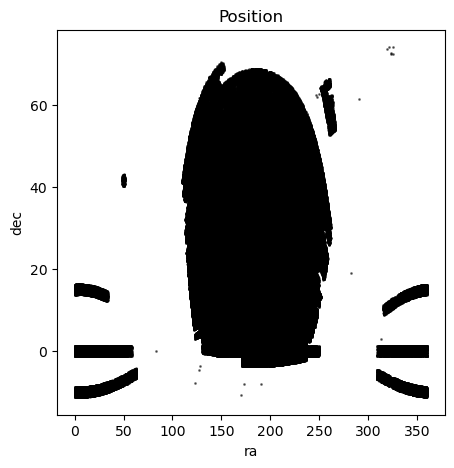

In [237]:
ra0 = data0['ra']
dec0 = data0['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra0, dec0, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position')
plt.show()

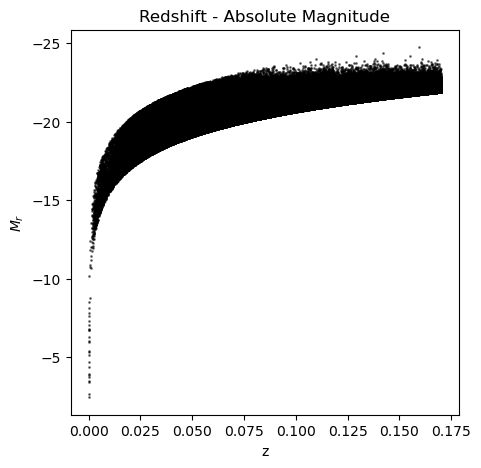

In [238]:
z0 = data0['z']
r_mag0 = data0['petroMag_r']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = r_mag0 - 5.0 * np.log10(dL0) - 25.0

plt.figure(figsize=(5,5))
plt.scatter(z0, Mr0, c='k', s=1, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.title('Redshift - Absolute Magnitude')
plt.show()

In [239]:
print(len(data0['specObjID']))
print(np.where(dL0 <= 0)[0])
print(dL0[np.where(dL0 <= 0)[0]])

406938
[]
[]


In [240]:

# criteria
cri_mr = data0['petroMag_r'] < 17.77

z0 = data0['z']
dL0 = cosmo.luminosity_distance(z0).value
Mr0 = data0['petroMag_r'] - 5 * np.log10(dL0) - 25
Mr_limit = 17.77 - 5 * np.log10(np.max(dL0)) - 25
cri_Mr = Mr0 < Mr_limit

cri_dL = dL0 > 0
cri_nono = data0['oiii_5007_flux'] != 0
cri_nona = data0['h_alpha_flux'] != 0
cri_nonb = data0['h_beta_flux'] != 0
cri_nond = data0['h_delta_flux'] != 0

cri = cri_mr & cri_Mr & cri_dL & cri_nono & cri_nona & cri_nonb & cri_nond
data = data0[cri]
print(len(data0['specObjID']), 'to', len(data['specObjID']))
print(f"Mr limit : {Mr_limit}")

406938 to 82445
Mr limit : -21.819396214977044


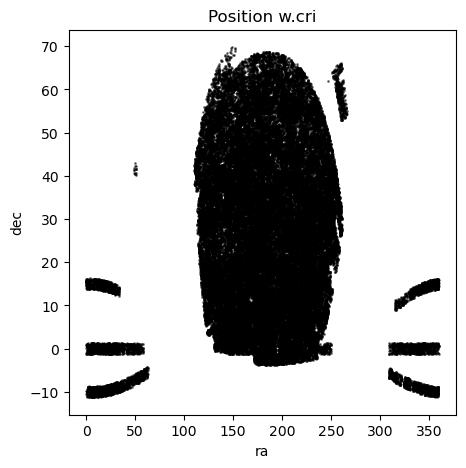

In [241]:
ra = data['ra']
dec = data['dec']

plt.figure(figsize=(5,5))
plt.scatter(ra, dec, c='k', s=1, alpha=0.5)
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position w.cri')
plt.show()

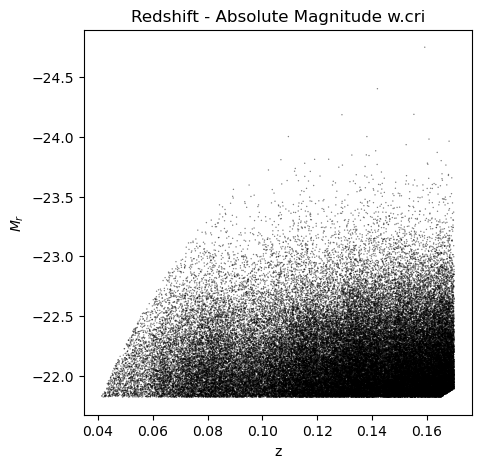

In [242]:
z = data['z']
r_mag = data['petroMag_r']
dL = cosmo.luminosity_distance(z).value
Mr = r_mag - 5.0 * np.log10(dL) - 25.0

fig = plt.figure(figsize=(5,5))
plt.scatter(z, Mr, c='k', s=1, alpha=0.5, edgecolor='None')
plt.gca().invert_yaxis()
plt.xlabel('z')
plt.ylabel('$M_r$')
plt.title('Redshift - Absolute Magnitude w.cri')
plt.show()

In [243]:
# 'h_alpha_flux' 'h_beta_flux' 'oiii_5007_flux' 'oi_6300_flux' 'nii_6584_flux' 'sii_6717_flux' 'sii_6731_flux' 'h_delta_flux'

oiii = data['oiii_5007_flux']
nii = data['nii_6584_flux']
siiw = data['sii_6717_flux']
siis = data['sii_6731_flux']
oi = data['oi_6300_flux']
ha = data['h_alpha_flux']
hb = data['h_beta_flux']
hd = data['h_delta_flux']

In [244]:
print(len(np.where(oiii < 0)[0]))

4738


In [245]:
cri_mon1 = oiii / hb > 0
cri_mon2 = nii / ha > 0
cri_mon = cri_mon1 & cri_mon2

print(len(oiii), len(oiii[cri_mon]))

82445 67361


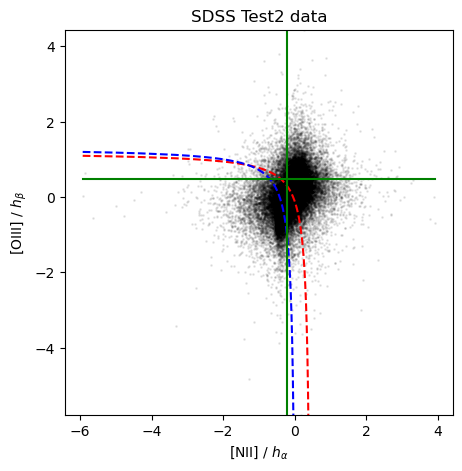

In [246]:
oiii_hb = np.log10(oiii[cri_mon] / hb[cri_mon])
nii_ha = np.log10(nii[cri_mon] / ha[cri_mon])

xline_nii_ha = nii_ha[nii_ha < 0.47]
yline_nii_ha = 0.61 / (nii_ha[nii_ha < 0.47] - 0.47) + 1.19
s = xline_nii_ha.argsort()
x_nii_ha = xline_nii_ha[s]
y_nii_ha = yline_nii_ha[s]

xline2_nii_ha = nii_ha[nii_ha < 0.05]
yline2_nii_ha = 0.61 / (nii_ha[nii_ha < 0.05] - 0.05) + 1.3
s = xline2_nii_ha.argsort()
x2_nii_ha = xline2_nii_ha[s]
y2_nii_ha = yline2_nii_ha[s]

plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1, alpha=0.08)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.show()

In [247]:
# Seyferts vs. LINERs
agn = []
for i in range(len(nii_ha)):
    if oiii_hb[i] > 0.61 / (nii_ha[i] - 0.47) + 1.19 or nii_ha[i] > 0.47:
        agn.append(i)

sey1 = nii_ha[agn] > np.log10(0.6)
sey2 = oiii_hb[agn] > np.log10(3)
sey = sey1 & sey2
print(sey)

liner1 = nii_ha[agn] > np.log10(0.6)
liner2 = oiii_hb[agn] < np.log10(3)
liner = liner1 & liner2
print(liner)

[ True False False ...  True  True False]
[False  True  True ... False False  True]


In [248]:
print(len(np.where(sey == True)[0]), len(np.where(liner == True)[0]))

8268 21104


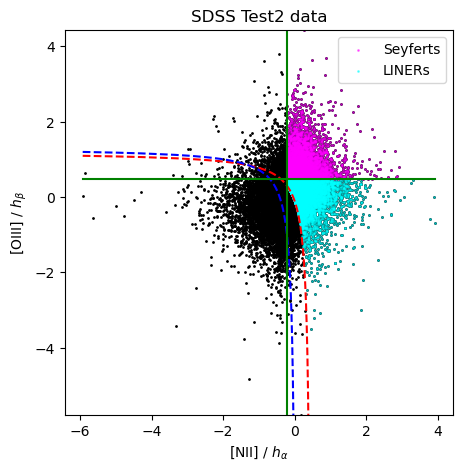

In [249]:
plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.scatter(nii_ha[agn][sey], oiii_hb[agn][sey], c='magenta', s=1, alpha=0.5, label='Seyferts')
plt.scatter(nii_ha[agn][liner], oiii_hb[agn][liner], c='cyan', s=1, alpha=0.5, label='LINERs')
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.legend()
plt.show()

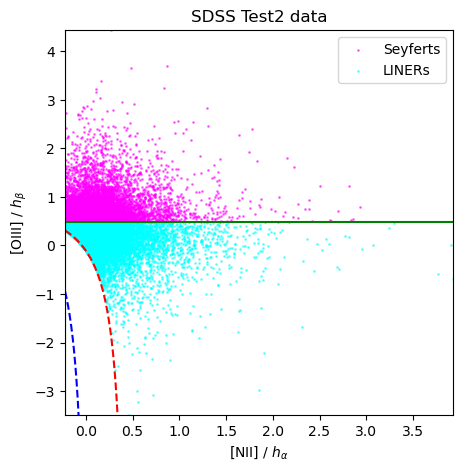

In [250]:
# same image, more precise
plt.figure(figsize=(5,5))
plt.scatter(nii_ha[agn][sey], oiii_hb[agn][sey], c='magenta', s=1, alpha=0.5, label='Seyferts')
plt.scatter(nii_ha[agn][liner], oiii_hb[agn][liner], c='cyan', s=1, alpha=0.5, label='LINERs')
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.xlim(min(nii_ha[agn][sey]), max(nii_ha[agn]))
plt.ylim(min(oiii_hb[agn][liner]), max(oiii_hb[agn][sey]))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.legend()
plt.show()

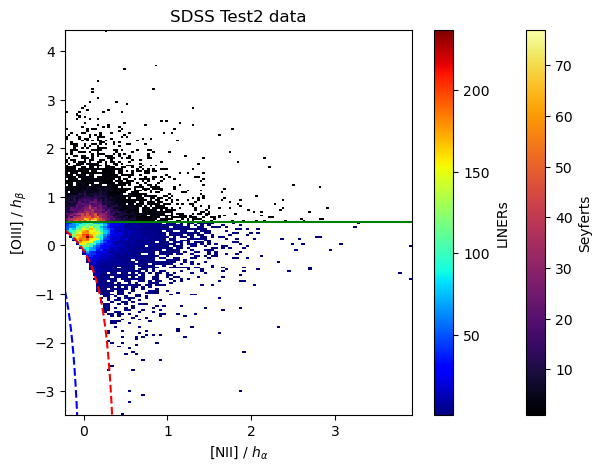

In [251]:
fig = plt.figure(figsize=(7,5))
h_sey = plt.hist2d(x=nii_ha[agn][sey], y=oiii_hb[agn][sey], bins=100, cmin=1, cmap='inferno', label='Seyferts')
fig.colorbar(h_sey[3], ax=plt.gca(), label='Seyferts')
h_liner = plt.hist2d(x=nii_ha[agn][liner], y=oiii_hb[agn][liner], bins=100, cmin=1, cmap='jet', label='LINERs')
fig.colorbar(h_liner[3], ax=plt.gca(), label='LINERs')

plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

plt.xlim(min(nii_ha[agn][sey]), max(nii_ha[agn]))
plt.ylim(min(oiii_hb[agn][liner]), max(oiii_hb[agn][sey]))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
plt.show()

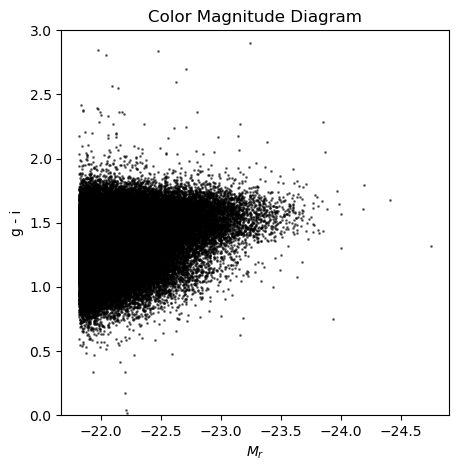

In [252]:
# CMD
g = data['petroMag_g']
i = data['petroMag_i']
g_i = g - i

plt.figure(figsize=(5,5))
plt.scatter(Mr, g_i, c='k', s=1, alpha=0.5)
plt.gca().invert_xaxis()
plt.ylim(0, 3)
plt.xlabel('$M_r$')
plt.ylabel('g - i')
plt.title('Color Magnitude Diagram')
plt.show()

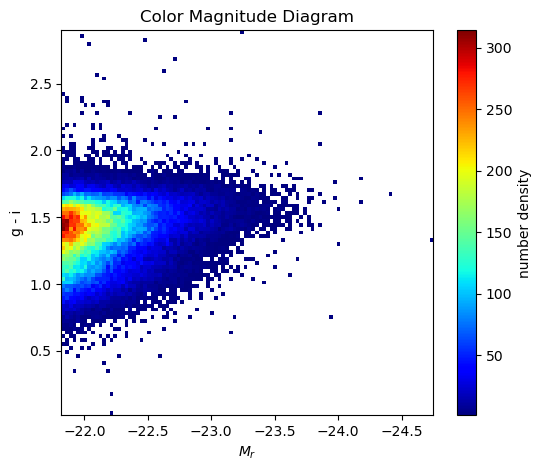

In [253]:
plt.figure(figsize=(6,5))
plt.xlabel('$M_r$')
plt.ylabel('g - i')
plt.title('Color Magnitude Diagram')
gi1 = g_i > 0
gi2 = g_i < 3
gi_0_3 = gi1 & gi2
h_cmd = plt.hist2d(x=Mr[gi_0_3], y=g_i[gi_0_3], bins=100, cmin=1, cmap='jet', label='number density')
plt.gca().invert_xaxis()
fig.colorbar(h_cmd[3], ax=plt.gca(), label='number density')

plt.show()

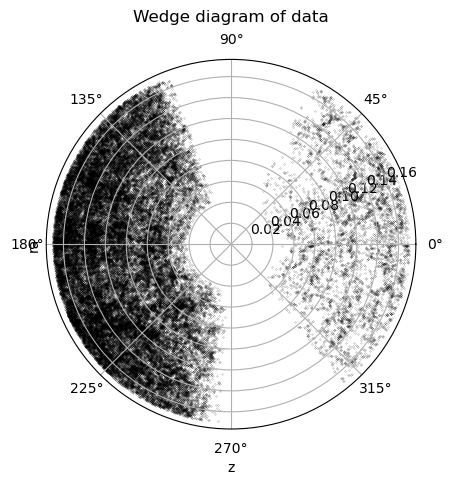

In [254]:
# Binning

# Wedge diagram
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
plt.show()

In [255]:
z = data['z']

binned_test = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16]
binning_test = 0.001
for i in binned_test:
    z_1_test = z > i - binning_test
    z_2_test = z < i + binning_test
    z_t_test = z_1_test & z_2_test
    globals()['z{}_bin_test'.format(int(i * 100))] = z_t_test
    globals()['z{}_test'.format(int(i * 100))] = data[z_t_test]

print(len(z2_test), len(z4_test), len(z6_test), len(z8_test), len(z10_test), len(z12_test), len(z14_test), len(z16_test))

0 0 343 828 884 1448 2057 2431


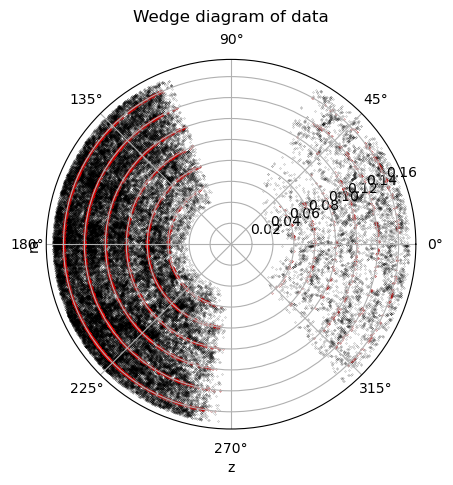

In [256]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)
for i in binned_test:
    ax.scatter(ra[globals()['z{}_bin_test'.format(int(i * 100))]] * np.pi / 180, z[globals()['z{}_bin_test'.format(int(i * 100))]],
               marker='.', color='red', s=0.1, alpha=0.75, label=f'z = {i}')

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
# plt.legend()
plt.show()

In [257]:
z = data['z']
z_agn = data['z'][agn]
z_sey = data['z'][agn][sey]
z_liner = data['z'][agn][liner]

print("ex) AGN binning z")
binned = np.linspace(0.04, 0.17, 41)[:-1]
binning = 0.00325
for i in range(len(binned)):
    z_1 = z >= binned[i]
    z_2 = z < binned[i] + 0.00325
    z_t = z_1 & z_2
    globals()['z{}_bin'.format(int(binned[i] * 100000))] = z_t
    globals()['z{}'.format(int(binned[i] * 100000))] = data[z_t]
    
    z_agn_1 = z_agn >= binned[i]
    z_agn_2 = z_agn < binned[i] + 0.00325
    z_agn_t = z_agn_1 & z_agn_2
    globals()['z{}_agn_bin'.format(int(binned[i] * 100000))] = z_agn_t
    globals()['z{}_agn'.format(int(binned[i] * 100000))] = data[agn][z_agn_t]
    
    z_sey_1 = z_sey >= binned[i]
    z_sey_2 = z_sey < binned[i] + 0.00325
    z_sey_t = z_sey_1 & z_sey_2
    globals()['z{}_sey_bin'.format(int(binned[i] * 100000))] = z_sey_t
    globals()['z{}_sey'.format(int(binned[i] * 100000))] = data[agn][sey][z_sey_t]
    
    z_liner_1 = z_liner >= binned[i]
    z_liner_2 = z_liner < binned[i] + 0.00325
    z_liner_t = z_liner_1 & z_liner_2
    globals()['z{}_liner_bin'.format(int(binned[i] * 100000))] = z_liner_t
    globals()['z{}_liner'.format(int(binned[i] * 100000))] = data[agn][liner][z_liner_t]
    
    print(f"{binned[i]:.5f} to {binned[i] + 0.00325:.5f} :\
{len(globals()['z{}_agn'.format(int(binned[i] * 100000))])}")

ex) AGN binning z
0.04000 to 0.04325 :8
0.04325 to 0.04650 :54
0.04650 to 0.04975 :83
0.04975 to 0.05300 :99
0.05300 to 0.05625 :132
0.05625 to 0.05950 :165
0.05950 to 0.06275 :235
0.06275 to 0.06600 :309
0.06600 to 0.06925 :299
0.06925 to 0.07250 :342
0.07250 to 0.07575 :381
0.07575 to 0.07900 :442
0.07900 to 0.08225 :511
0.08225 to 0.08550 :522
0.08550 to 0.08875 :520
0.08875 to 0.09200 :472
0.09200 to 0.09525 :501
0.09525 to 0.09850 :506
0.09850 to 0.10175 :556
0.10175 to 0.10500 :652
0.10500 to 0.10825 :647
0.10825 to 0.11150 :721
0.11150 to 0.11475 :870
0.11475 to 0.11800 :861
0.11800 to 0.12125 :804
0.12125 to 0.12450 :886
0.12450 to 0.12775 :1072
0.12775 to 0.13100 :1073
0.13100 to 0.13425 :1200
0.13425 to 0.13750 :1356
0.13750 to 0.14075 :1277
0.14075 to 0.14400 :1264
0.14400 to 0.14725 :1278
0.14725 to 0.15050 :1447
0.15050 to 0.15375 :1532
0.15375 to 0.15700 :1438
0.15700 to 0.16025 :1517
0.16025 to 0.16350 :1546
0.16350 to 0.16675 :1711
0.16675 to 0.17000 :1457


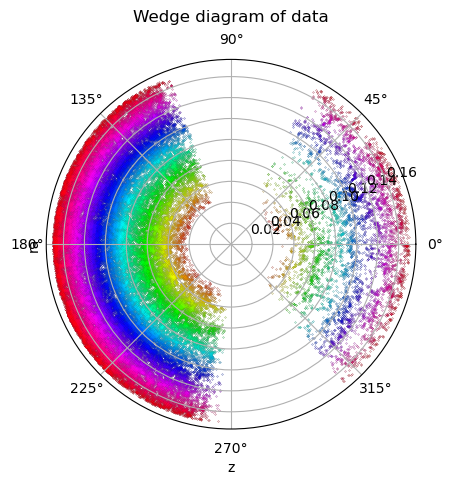

In [258]:
# Wedge diagram
coloring = plt.cm.get_cmap("hsv", len(binned))

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.scatter(ra * np.pi / 180, z, marker='.', color='black', s=0.1, alpha=0.75)
for i in range(len(binned)):
    ax.scatter(ra[globals()['z{}_bin'.format(int(binned[i] * 100000))]] * np.pi / 180,
               z[globals()['z{}_bin'.format(int(binned[i] * 100000))]],
               marker='.', color=coloring(i), s=0.1, alpha=0.75, label=f'z = {binned[i]}')

# ax.set_rmin(0.00)
# ax.set_rmax(0.10)

ax.set_xlabel("z")
ax.set_ylabel("ra")
ax.set_title("Wedge diagram of data", va='bottom')
# plt.legend()
plt.show()

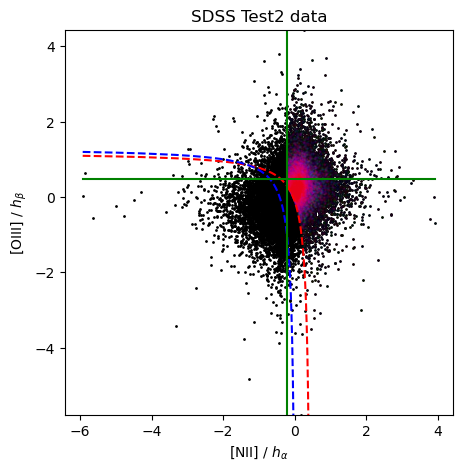

In [259]:
# z binning in BPT
plt.figure(figsize=(5,5))
plt.scatter(nii_ha, oiii_hb, c='k', s=1)
plt.plot(x_nii_ha, y_nii_ha, 'r--')
plt.plot(x2_nii_ha, y2_nii_ha, 'b--')
plt.plot([np.log10(0.6), np.log10(0.6)], [min(oiii_hb), max(oiii_hb)], color='g')
plt.plot([min(nii_ha), max(nii_ha)], [np.log10(3), np.log10(3)], color='g')

for i in range(len(binned)):
    plt.scatter(nii_ha[agn][sey][globals()['z{}_sey_bin'.format(int(binned[i] * 100000))]],
                oiii_hb[agn][sey][globals()['z{}_sey_bin'.format(int(binned[i] * 100000))]],
                color=coloring(i), s=1, alpha=0.04,
                label=f'Seyferts in {binned[i]:.5f} to {binned[i] + 0.00325:.5f}')
    plt.scatter(nii_ha[agn][liner][globals()['z{}_liner_bin'.format(int(binned[i] * 100000))]],
                oiii_hb[agn][liner][globals()['z{}_liner_bin'.format(int(binned[i] * 100000))]],
                color=coloring(i), s=1, alpha=0.04,
                label=f'LINERs in {binned[i]:.5f} to {binned[i] + 0.00325:.5f}')
    
plt.ylim(min(oiii_hb), max(oiii_hb))

plt.xlabel(r'[NII] / $h_{\alpha}$')
plt.ylabel(r'[OIII] / $h_{\beta}$')
plt.title('SDSS Test2 data')
# plt.legend()
plt.show()

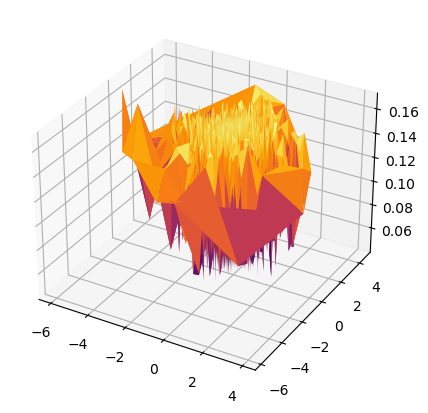

In [260]:
# 3D plot to z
# X, Y = np.meshgrid(nii_ha, oiii_hb)

# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(nii_ha, oiii_hb, z, c=z, cmap="inferno", s=2, alpha=0.5)
# plt.show()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(nii_ha, oiii_hb, z, cmap="inferno")
# ax.contour(X, Y, z, levels=20, colors="k", linewidths=1)
plt.show()

In [261]:
# number
num_all = []
num_agn = []
num_sey = []
num_liner = []
for i in range(len(binned)):
    num_all.append(len(globals()['z{}'.format(int(binned[i] * 100000))]))
    num_agn.append(len(globals()['z{}_agn'.format(int(binned[i] * 100000))]))
    num_sey.append(len(globals()['z{}_sey'.format(int(binned[i] * 100000))]))
    num_liner.append(len(globals()['z{}_liner'.format(int(binned[i] * 100000))]))

num_all = np.array(num_all)
num_agn = np.array(num_agn)
num_sey = np.array(num_sey)
num_liner = np.array(num_liner)

# fraction
frac_agn = [binned, num_agn / num_all]
frac_sey = [binned, num_sey / num_agn]
frac_liner = [binned, num_liner / num_agn]

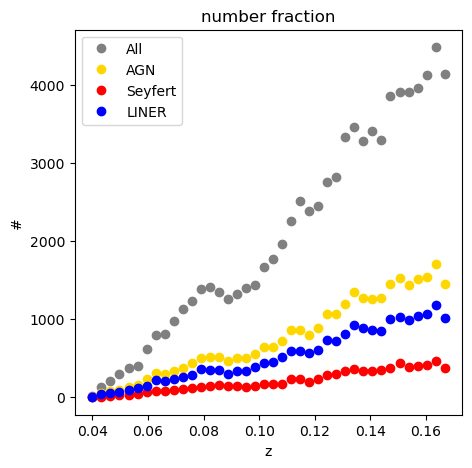

In [262]:
# number fraction
plt.figure(figsize=(5,5))
plt.plot(binned, num_all, marker='o', ls='', color='gray', label='All')
plt.plot(binned, num_agn, marker='o', ls='', color='gold', label='AGN')
plt.plot(binned, num_sey, marker='o', ls='', color='red', label='Seyfert')
plt.plot(binned, num_liner, marker='o', ls='', color='blue', label='LINER')

plt.xlabel('z')
plt.ylabel('#')
plt.title('number fraction')
plt.legend()
plt.show()

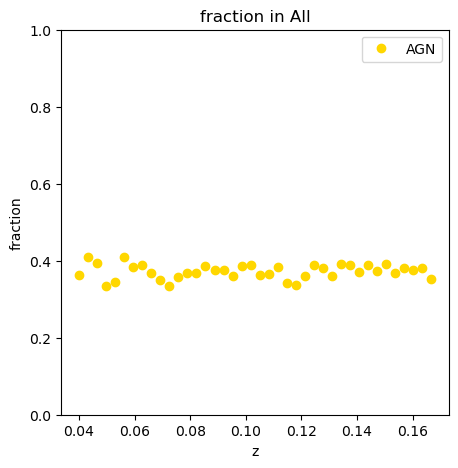

In [263]:
# All to AGN
plt.figure(figsize=(5,5))
plt.plot(frac_agn[0], frac_agn[1], ls='', marker='o', color='gold', label='AGN')
plt.ylim(0, 1)

plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in All')
plt.legend()
plt.show()

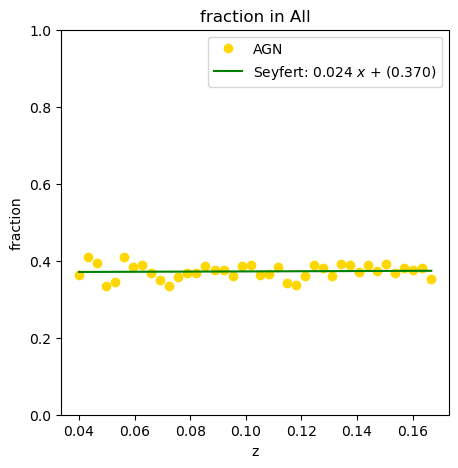

In [264]:
# All to AGN
# fiducial line (curve fit)
def f(x, a, b):
    return a * x + b

popt_agn, pcov_agn = curve_fit(f, frac_agn[0], frac_agn[1])

plt.figure(figsize=(5,5))
plt.plot(frac_agn[0], frac_agn[1], marker='o', ls='', color='gold', label='AGN')
plt.plot(frac_agn[0], f(frac_agn[0], popt_agn[0], popt_agn[1]), 'g-',
         label=f'Seyfert: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})')

plt.ylim(0, 1)
plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in All')
plt.legend()
plt.show()

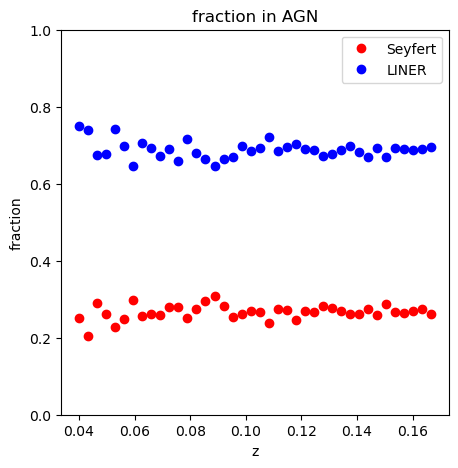

In [265]:
# AGN to sey, liner
plt.figure(figsize=(5,5))
plt.plot(frac_sey[0], frac_sey[1], marker='o', ls='', color='red', label='Seyfert')
plt.plot(frac_liner[0], frac_liner[1], marker='o', ls='', color='blue', label='LINER')
plt.ylim(0, 1)

plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in AGN')
plt.legend()
plt.show()

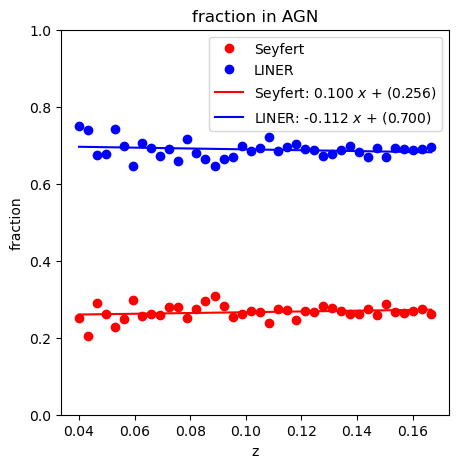

In [266]:
# AGN to sey, liner
# fiducial line (curve fit)
def f(x, a, b):
    return a * x + b

popt_sey, pcov_sey = curve_fit(f, frac_sey[0], frac_sey[1])
popt_liner, pcov_liner = curve_fit(f, frac_liner[0], frac_liner[1])

plt.figure(figsize=(5,5))
plt.plot(frac_sey[0], frac_sey[1], marker='o', ls='', color='red', label='Seyfert')
plt.plot(frac_liner[0], frac_liner[1], marker='o', ls='', color='blue', label='LINER')

plt.plot(frac_sey[0], f(frac_sey[0], popt_sey[0], popt_sey[1]), 'r-',
         label=f'Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')
plt.plot(frac_liner[0], f(frac_liner[0], popt_liner[0], popt_liner[1]), 'b-',
         label=f'LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})')

plt.ylim(0, 1)
plt.xlabel('z')
plt.ylabel('fraction')
plt.title('fraction in AGN')
plt.legend()
plt.show()

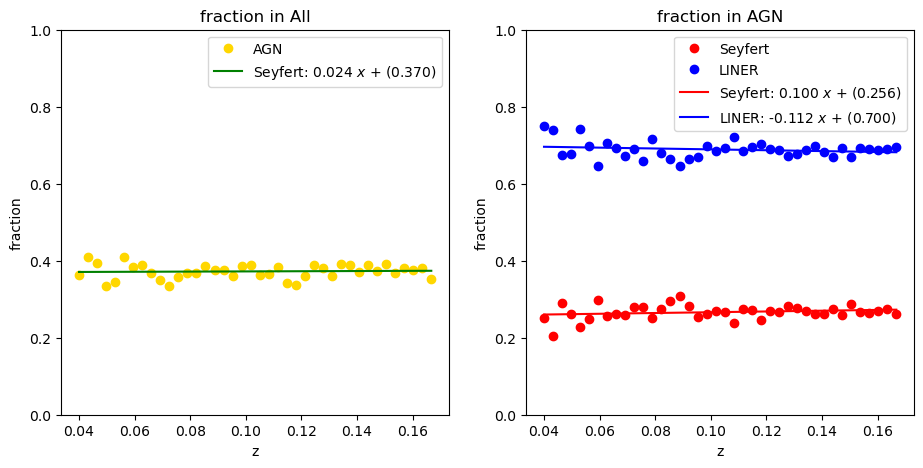

In [267]:
# All in one figure
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_agn[0], frac_agn[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(frac_agn[0], f(frac_agn[0], popt_agn[0], popt_agn[1]), 'g-',
         label=f'Seyfert: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})')

ax0.set_ylim(0, 1)
ax0.set_xlabel('z')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(frac_sey[0], frac_sey[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(frac_liner[0], frac_liner[1], marker='o', ls='', color='blue', label='LINER')

ax1.plot(frac_sey[0], f(frac_sey[0], popt_sey[0], popt_sey[1]), 'r-',
         label=f'Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})')
ax1.plot(frac_liner[0], f(frac_liner[0], popt_liner[0], popt_liner[1]), 'b-',
         label=f'LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})')

ax1.set_ylim(0, 1)
ax1.set_xlabel('z')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

In [268]:
# x-axis: z -> a
binned_a = 1 / (1 + binned)

num_all_a = [binned_a, num_all[1]]
num_agn_a = [binned_a, num_agn[1]]
num_sey_a = [binned_a, num_sey[1]]
num_liner_a = [binned_a, num_liner[1]]

frac_agn_a = [binned_a, frac_agn[1]]
frac_sey_a = [binned_a, frac_sey[1]]
frac_liner_a = [binned_a, frac_liner[1]]

frac_agn_a = np.array(frac_agn_a)
frac_sey_a = np.array(frac_sey_a)
frac_liner_a = np.array(frac_liner_a)

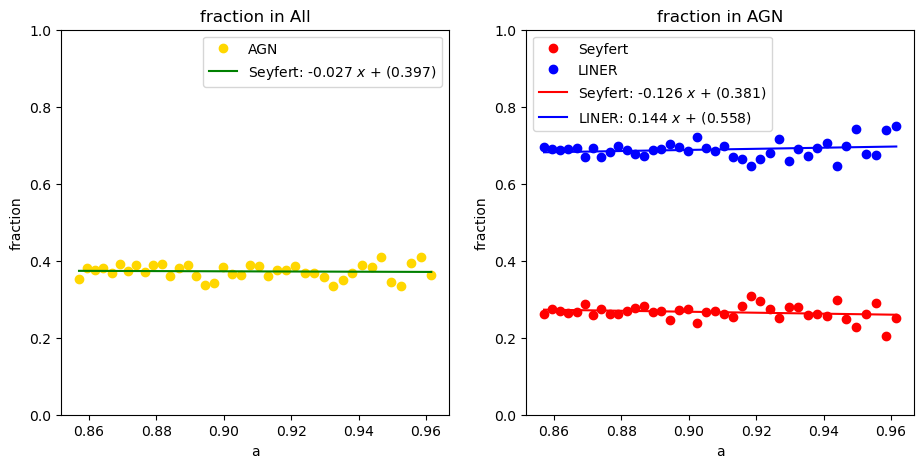

In [269]:
# fiducial line (curve fit)
popt_agn_a, pcov_agn_a = curve_fit(f, frac_agn_a[0], frac_agn_a[1])
popt_sey_a, pcov_sey_a = curve_fit(f, frac_sey_a[0], frac_sey_a[1])
popt_liner_a, pcov_liner_a = curve_fit(f, frac_liner_a[0], frac_liner_a[1])

# plot x-axis: a
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_agn_a[0], frac_agn_a[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(frac_agn_a[0], f(frac_agn_a[0], popt_agn_a[0], popt_agn_a[1]), 'g-',
         label=f'Seyfert: {popt_agn_a[0]:.3f} $x$ + ({popt_agn_a[1]:.3f})')

ax0.set_ylim(0, 1)
ax0.set_xlabel('a')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(frac_sey_a[0], frac_sey_a[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(frac_liner_a[0], frac_liner_a[1], marker='o', ls='', color='blue', label='LINER')

ax1.plot(frac_sey_a[0], f(frac_sey_a[0], popt_sey_a[0], popt_sey_a[1]), 'r-',
         label=f'Seyfert: {popt_sey_a[0]:.3f} $x$ + ({popt_sey_a[1]:.3f})')
ax1.plot(frac_liner_a[0], f(frac_liner_a[0], popt_liner_a[0], popt_liner_a[1]), 'b-',
         label=f'LINER: {popt_liner_a[0]:.3f} $x$ + ({popt_liner_a[1]:.3f})')

ax1.set_ylim(0, 1)
ax1.set_xlabel('a')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

In [270]:
# x-axis: z -> a^3
binned_a3 = binned_a ** 3

num_all_a3 = [binned_a3, num_all[1]]
num_agn_a3 = [binned_a3, num_agn[1]]
num_sey_a3 = [binned_a3, num_sey[1]]
num_liner_a3 = [binned_a3, num_liner[1]]

frac_agn_a3 = [binned_a3, frac_agn[1]]
frac_sey_a3 = [binned_a3, frac_sey[1]]
frac_liner_a3 = [binned_a3, frac_liner[1]]

frac_agn_a3 = np.array(frac_agn_a3)
frac_sey_a3 = np.array(frac_sey_a3)
frac_liner_a3 = np.array(frac_liner_a3)

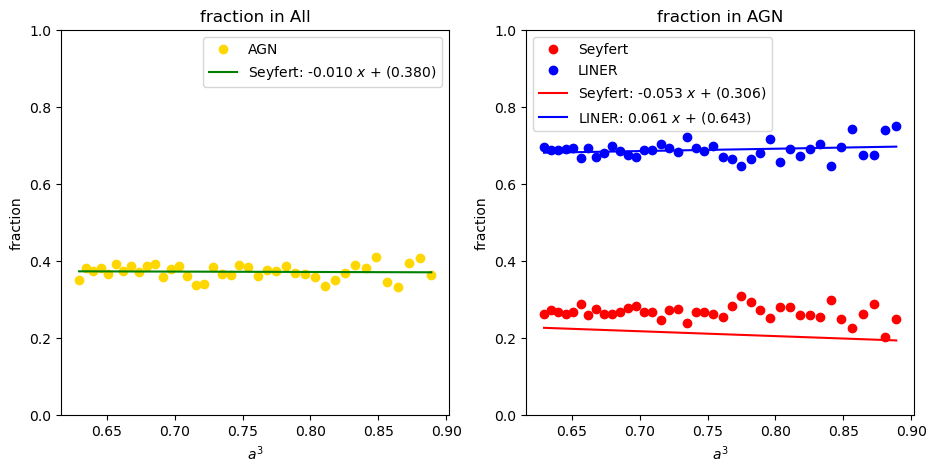

In [271]:
# fiducial line (curve fit)
popt_agn_a3, pcov_agn_a3 = curve_fit(f, frac_agn_a3[0], frac_agn_a3[1])
popt_sey_a3, pcov_sey_a3 = curve_fit(f, frac_sey_a3[0], frac_sey_a3[1])
popt_liner_a3, pcov_liner_a3 = curve_fit(f, frac_liner_a3[0], frac_liner_a3[1])

# plot x-axis: a^3
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_agn_a3[0], frac_agn_a3[1], marker='o', ls='', color='gold', label='AGN')
ax0.plot(frac_agn_a3[0], f(frac_agn_a3[0], popt_agn_a3[0], popt_agn_a3[1]), 'g-',
         label=f'Seyfert: {popt_agn_a3[0]:.3f} $x$ + ({popt_agn_a3[1]:.3f})')

ax0.set_ylim(0, 1)
ax0.set_xlabel('$a^3$')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(frac_sey_a3[0], frac_sey_a3[1], marker='o', ls='', color='red', label='Seyfert')
ax1.plot(frac_liner_a3[0], frac_liner_a3[1], marker='o', ls='', color='blue', label='LINER')

ax1.plot(frac_sey_a3[0], f(frac_sey_a3[0], popt_sey_a[0], popt_sey_a3[1]), 'r-',
         label=f'Seyfert: {popt_sey_a3[0]:.3f} $x$ + ({popt_sey_a3[1]:.3f})')
ax1.plot(frac_liner_a3[0], f(frac_liner_a3[0], popt_liner_a3[0], popt_liner_a3[1]), 'b-',
         label=f'LINER: {popt_liner_a3[0]:.3f} $x$ + ({popt_liner_a3[1]:.3f})')

ax1.set_ylim(0, 1)
ax1.set_xlabel('$a^3$')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

In [272]:
# chi-square test
# function: chi-square
def chi2(y, line):
    chi_s = np.sum(((y - line) ** 2) / line)
    return chi_s

y_agn = np.array(frac_agn[1])
line_agn = f(frac_agn[0], popt_agn[0], popt_agn[1])
chi_agn = chi2(y_agn, line_agn)

y_sey = np.array(frac_sey[1])
line_sey = f(frac_sey[0], popt_sey[0], popt_sey[1])
chi_sey = chi2(y_sey, line_sey)

y_liner = np.array(frac_liner[1])
line_liner = f(frac_liner[0], popt_liner[0], popt_liner[1])
chi_liner = chi2(y_liner, line_liner)

print(f"[z] chi2\nAGN : {chi_agn}\nSeyfert : {chi_sey}\nLINER : {chi_liner}")

y_agn_a = np.array(frac_agn_a[1])
line_agn_a = f(frac_agn_a[0], popt_agn_a[0], popt_agn_a[1])
chi_agn_a = chi2(y_agn_a, line_agn_a)

y_sey_a = np.array(frac_sey_a[1])
line_sey_a = f(frac_sey_a[0], popt_sey_a[0], popt_sey_a[1])
chi_sey_a = chi2(y_sey_a, line_sey_a)

y_liner_a = np.array(frac_liner_a[1])
line_liner_a = f(frac_liner_a[0], popt_liner_a[0], popt_liner_a[1])
chi_liner_a = chi2(y_liner_a, line_liner_a)

print(f"[a] chi2\nAGN : {chi_agn_a}\nSeyfert : {chi_sey_a}\nLINER : {chi_liner_a}")

y_agn_a3 = np.array(frac_agn_a3[1])
line_agn_a3 = f(frac_agn_a3[0], popt_agn_a3[0], popt_agn_a3[1])
chi_agn_a3 = chi2(y_agn_a3, line_agn_a3)

y_sey_a3 = np.array(frac_sey_a3[1])
line_sey_a3 = f(frac_sey_a3[0], popt_sey_a3[0], popt_sey_a3[1])
chi_sey_a3 = chi2(y_sey_a3, line_sey_a3)

y_liner_a3 = np.array(frac_liner_a3[1])
line_liner_a3 = f(frac_liner_a3[0], popt_liner_a3[0], popt_liner_a3[1])
chi_liner_a3 = chi2(y_liner_a3, line_liner_a3)

print(f"[a^3] chi2\nAGN : {chi_agn_a3}\nSeyfert : {chi_sey_a3}\nLINER : {chi_liner_a3}")

[z] chi2
AGN : 0.03696633321371797
Seyfert : 0.05034988792405156
LINER : 0.027925441355142043
[a] chi2
AGN : 0.036976503882422095
Seyfert : 0.05020395589846538
LINER : 0.027801891348214813
[a^3] chi2
AGN : 0.03698592556049782
Seyfert : 0.05004899027940015
LINER : 0.02767019514024697


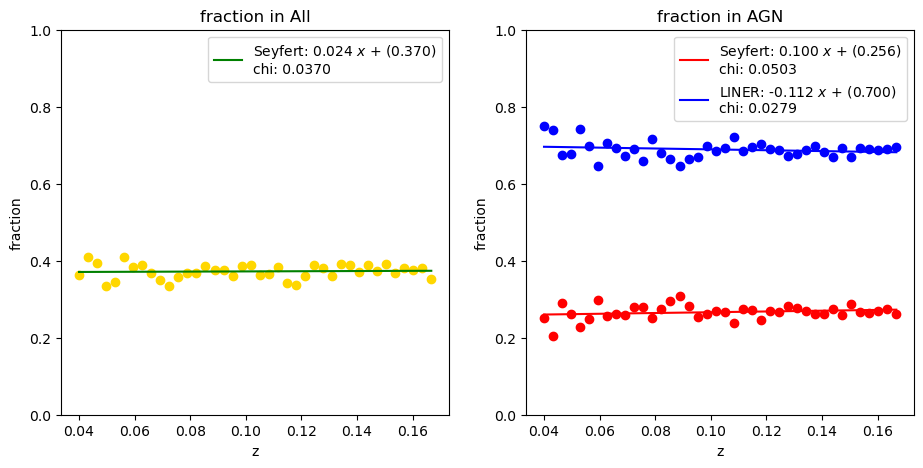

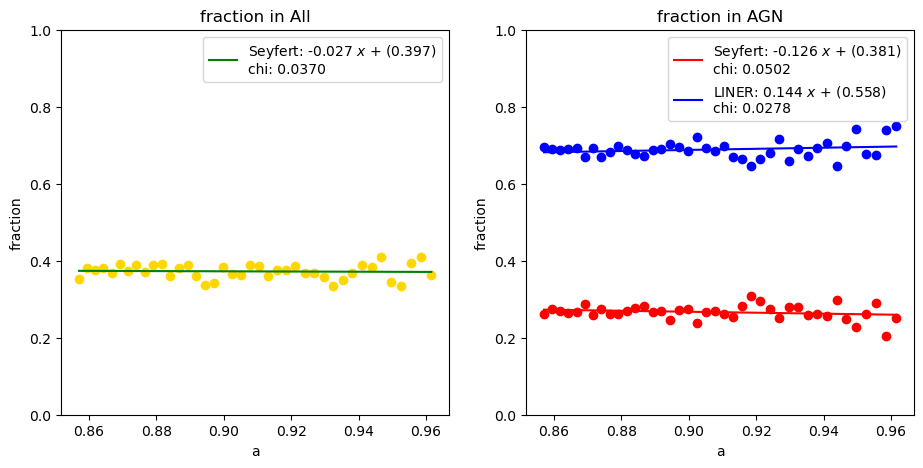

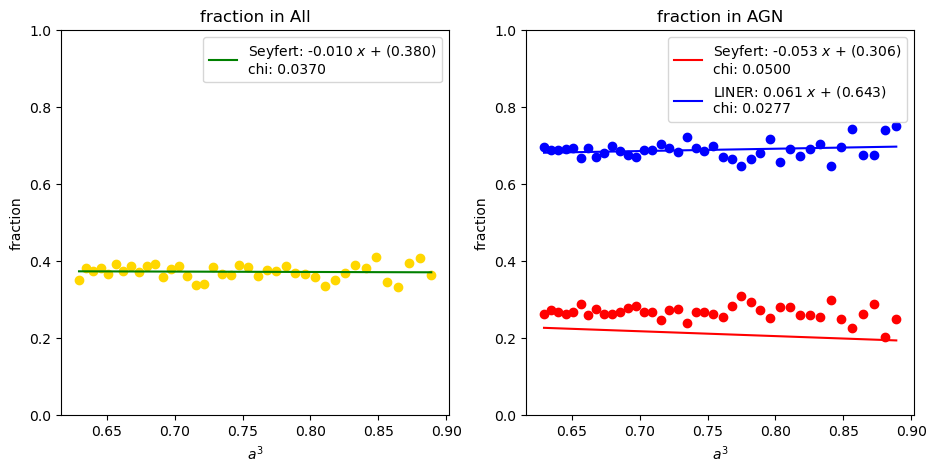

In [273]:
# plot all of x-axis

# plot x-axis: z
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_agn[0], frac_agn[1], marker='o', ls='', color='gold')
ax0.plot(frac_agn[0], f(frac_agn[0], popt_agn[0], popt_agn[1]), 'g-',
         label=f'Seyfert: {popt_agn[0]:.3f} $x$ + ({popt_agn[1]:.3f})\nchi: {chi_agn:.4f}')

ax0.set_ylim(0, 1)
ax0.set_xlabel('z')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(frac_sey[0], frac_sey[1], marker='o', ls='', color='red')
ax1.plot(frac_liner[0], frac_liner[1], marker='o', ls='', color='blue')

ax1.plot(frac_sey[0], f(frac_sey[0], popt_sey[0], popt_sey[1]), 'r-',
         label=f'Seyfert: {popt_sey[0]:.3f} $x$ + ({popt_sey[1]:.3f})\nchi: {chi_sey:.4f}')
ax1.plot(frac_liner[0], f(frac_liner[0], popt_liner[0], popt_liner[1]), 'b-',
         label=f'LINER: {popt_liner[0]:.3f} $x$ + ({popt_liner[1]:.3f})\nchi: {chi_liner:.4f}')

ax1.set_ylim(0, 1)
ax1.set_xlabel('z')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

# plot x-axis: a
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_agn_a[0], frac_agn_a[1], marker='o', ls='', color='gold')
ax0.plot(frac_agn_a[0], f(frac_agn_a[0], popt_agn_a[0], popt_agn_a[1]), 'g-',
         label=f'Seyfert: {popt_agn_a[0]:.3f} $x$ + ({popt_agn_a[1]:.3f})\nchi: {chi_agn_a:.4f}')

ax0.set_ylim(0, 1)
ax0.set_xlabel('a')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(frac_sey_a[0], frac_sey_a[1], marker='o', ls='', color='red')
ax1.plot(frac_liner_a[0], frac_liner_a[1], marker='o', ls='', color='blue')

ax1.plot(frac_sey_a[0], f(frac_sey_a[0], popt_sey_a[0], popt_sey_a[1]), 'r-',
         label=f'Seyfert: {popt_sey_a[0]:.3f} $x$ + ({popt_sey_a[1]:.3f})\nchi: {chi_sey_a:.4f}')
ax1.plot(frac_liner_a[0], f(frac_liner_a[0], popt_liner_a[0], popt_liner_a[1]), 'b-',
         label=f'LINER: {popt_liner_a[0]:.3f} $x$ + ({popt_liner_a[1]:.3f})\nchi: {chi_liner_a:.4f}')

ax1.set_ylim(0, 1)
ax1.set_xlabel('a')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

# plot x-axis: a^3
fig = plt.figure(figsize=(11,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0.plot(frac_agn_a3[0], frac_agn_a3[1], marker='o', ls='', color='gold')
ax0.plot(frac_agn_a3[0], f(frac_agn_a3[0], popt_agn_a3[0], popt_agn_a3[1]), 'g-',
         label=f'Seyfert: {popt_agn_a3[0]:.3f} $x$ + ({popt_agn_a3[1]:.3f})\nchi: {chi_agn_a3:.4f}')

ax0.set_ylim(0, 1)
ax0.set_xlabel('$a^3$')
ax0.set_ylabel('fraction')
ax0.set_title('fraction in All')
ax0.legend()

ax1.plot(frac_sey_a3[0], frac_sey_a3[1], marker='o', ls='', color='red')
ax1.plot(frac_liner_a3[0], frac_liner_a3[1], marker='o', ls='', color='blue')

ax1.plot(frac_sey_a3[0], f(frac_sey_a3[0], popt_sey_a[0], popt_sey_a3[1]), 'r-',
         label=f'Seyfert: {popt_sey_a3[0]:.3f} $x$ + ({popt_sey_a3[1]:.3f})\nchi: {chi_sey_a3:.4f}')
ax1.plot(frac_liner_a3[0], f(frac_liner_a3[0], popt_liner_a3[0], popt_liner_a3[1]), 'b-',
         label=f'LINER: {popt_liner_a3[0]:.3f} $x$ + ({popt_liner_a3[1]:.3f})\nchi: {chi_liner_a3:.4f}')

ax1.set_ylim(0, 1)
ax1.set_xlabel('$a^3$')
ax1.set_ylabel('fraction')
ax1.set_title('fraction in AGN')
ax1.legend()

plt.show()

In [274]:
# number within 2 Mpc
N_2 = []
# distance to first closest companion
r_1 = []
# distance to second closest companion
r_2 = []
# distance to fifth closest companion
r_5 = []

# # agn
# agns = agn[500:2000]
# for i in range(len(agns)):
#     R = []
#     N = 0
#     for j in range(len(agns)):
#         if i != j:
#             dx = cosmo.angular_diameter_distance(np.abs(ra[agns][i] - ra[agns][j]) * np.pi / 180).value # Mpc
#             dy = cosmo.angular_diameter_distance(np.abs(dec[agns][i] - dec[agns][j]) * np.pi / 180).value # Mpc
#             dz = cosmo.luminosity_distance(np.abs(z[agns][i] - z[agns][j])).value # Mpc
#             dr = (dx ** 2 + dy ** 2 + dz ** 2) ** (1/2)
#             if dr < 10:
#                 if np.abs(z[agns][i] - z[agns][j]) < 0.1:
#                     R.append([dr, j, i])
                    
#                     if dr < 2:
#                         N += 1

#     # r: sorted companions [distance, companion, host]
#     if len(R) > 4:
#         N_2.append(N)
#         r = sorted(R)
#         r_1.append(r[0][0])
#         r_2.append(r[1][0])
#         r_5.append(r[4][0])

In [275]:
print(r_5)

[]


C:\Users\seohyun\AppData\Local\Temp\ipykernel_8172\4272889734.py:3: RuntimeWarning: invalid value encountered in log10
  lumi_oiii = np.log10(oiii * np.pi * ((cosmo.luminosity_distance(z).value * u.Mpc).to(u.cm, equivalencies=u.spectral()).value) ** 2)


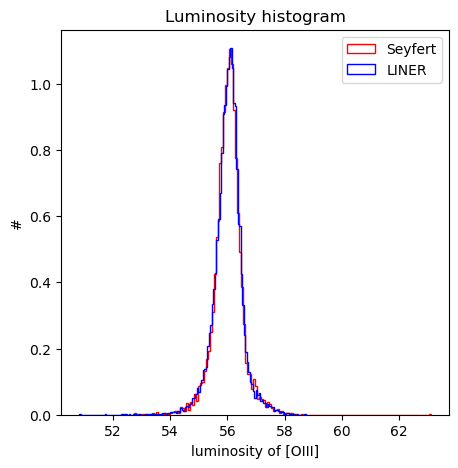

In [276]:
# 'oiii_5007_flux' 'oiii_5007_flux_err'
oiii_err = data['oiii_5007_flux_err']
lumi_oiii = np.log10(oiii * np.pi * ((cosmo.luminosity_distance(z).value * u.Mpc).to(u.cm, equivalencies=u.spectral()).value) ** 2)

plt.figure(figsize=(5,5))
plt.hist(lumi_oiii[agn][sey], bins=150, density=True, color='r', histtype='step', label='Seyfert')
plt.hist(lumi_oiii[agn][liner], bins=150, density=True, color='b', histtype='step', label='LINER')
plt.xlabel('luminosity of [OIII]')
plt.ylabel('#')
plt.title('Luminosity histogram')
plt.legend()
plt.show()